In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
train=pd.read_csv('Property_Price_Train.csv')


In [4]:
test=pd.read_csv('Property_Price_Test.csv')


In [5]:
train.head()


,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train=train.drop(['Id'],axis=1)


In [7]:
test=test.drop(['Id'],axis=1)


In [8]:
alldata=train.append(test)


C:\Users\Yogini\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [9]:
alldata.head(3)


,Air_Conditioning,Basement_Condition,Basement_Height,Bedroom_Above_Grade,Brick_Veneer_Area,Brick_Veneer_Type,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,...,Screen_Lobby_Area,Second_Floor_Area,Three_Season_Lobby_Area,Total_Basement_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Utility_Type,W_Deck_Area,Year_Sold,Zoning_Class
0,Y,TA,Gd,3,196.0,BrkFace,706.0,0.0,GLQ,Unf,...,0,854,0,856.0,1.0,0.0,AllPub,163.788080,2008,RLD
1,Y,TA,Gd,3,0.0,None,978.0,0.0,ALQ,Unf,...,0,0,0,1262.0,0.0,1.0,AllPub,198.900074,2007,RLD
2,Y,TA,Gd,3,162.0,BrkFace,486.0,0.0,GLQ,Unf,...,0,866,0,920.0,1.0,0.0,AllPub,26.127533,2008,RLD


In [10]:
alldata.shape


(2918, 80)

In [11]:
alldata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 1458
Data columns (total 80 columns):
Air_Conditioning             2918 non-null object
Basement_Condition           2836 non-null object
Basement_Height              2837 non-null object
Bedroom_Above_Grade          2918 non-null int64
Brick_Veneer_Area            2895 non-null float64
Brick_Veneer_Type            2894 non-null object
BsmtFinSF1                   2917 non-null float64
BsmtFinSF2                   2917 non-null float64
BsmtFinType1                 2839 non-null object
BsmtFinType2                 2838 non-null object
BsmtUnfSF                    2917 non-null float64
Building_Class               2918 non-null int64
Condition1                   2918 non-null object
Condition2                   2918 non-null object
Construction_Year            2918 non-null int64
Electrical_System            2917 non-null object
Enclosed_Lobby_Area          2918 non-null float64
Exposure_Level               2836 non-nul

In [12]:
alldata.isnull().sum()


Air_Conditioning                0
Basement_Condition             82
Basement_Height                81
Bedroom_Above_Grade             0
Brick_Veneer_Area              23
Brick_Veneer_Type              24
BsmtFinSF1                      1
BsmtFinSF2                      1
BsmtFinType1                   79
BsmtFinType2                   80
BsmtUnfSF                       1
Building_Class                  0
Condition1                      0
Condition2                      0
Construction_Year               0
Electrical_System               1
Enclosed_Lobby_Area             0
Exposure_Level                 82
Exterior1st                     1
Exterior2nd                     1
Exterior_Condition              0
Exterior_Material               0
Fence_Quality                2347
Fireplace_Quality            1419
Fireplaces                      0
First_Floor_Area                0
Foundation_Type                 0
Full_Bathroom_Above_Grade       0
Functional_Rate                 2
Garage        

In [13]:
alldata.dtypes


Air_Conditioning              object
Basement_Condition            object
Basement_Height               object
Bedroom_Above_Grade            int64
Brick_Veneer_Area            float64
Brick_Veneer_Type             object
BsmtFinSF1                   float64
BsmtFinSF2                   float64
BsmtFinType1                  object
BsmtFinType2                  object
BsmtUnfSF                    float64
Building_Class                 int64
Condition1                    object
Condition2                    object
Construction_Year              int64
Electrical_System             object
Enclosed_Lobby_Area          float64
Exposure_Level                object
Exterior1st                   object
Exterior2nd                   object
Exterior_Condition            object
Exterior_Material             object
Fence_Quality                 object
Fireplace_Quality             object
Fireplaces                     int64
First_Floor_Area               int64
Foundation_Type               object
F

In [14]:
alldata.describe()


,Bedroom_Above_Grade,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Building_Class,Construction_Year,Enclosed_Lobby_Area,Fireplaces,First_Floor_Area,...,Rooms_Above_Grade,Sale_Price,Screen_Lobby_Area,Second_Floor_Area,Three_Season_Lobby_Area,Total_Basement_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,W_Deck_Area,Year_Sold
count,2918.000000,2895.000000,2917.000000,2917.000000,2917.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,...,2918.000000,1459.000000,2918.000000,2918.000000,2918.000000,2917.000000,2916.000000,2916.000000,2918.000000,2918.000000
mean,2.860178,102.236615,441.290024,49.499829,560.917724,57.150446,1971.314942,24.411772,0.597327,1159.548663,...,6.451679,180944.102810,16.067855,336.599040,2.603153,1051.707576,0.429698,0.061385,93.095222,2007.792666
std,0.822830,179.355169,455.632103,169.176028,439.548616,42.519354,30.296408,64.346881,0.646145,392.425265,...,1.569626,79464.918335,56.193208,428.729653,25.192440,440.825601,0.524719,0.245726,126.257764,1.315184
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1872.000000,-164.807386,0.000000,334.000000,...,2.000000,34900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-338.112031,2006.000000
25%,2.000000,0.000000,0.000000,0.000000,220.000000,20.000000,1953.250000,0.000000,0.000000,876.000000,...,5.000000,129950.000000,0.000000,0.000000,0.000000,793.000000,0.000000,0.000000,0.000000,2007.000000
50%,3.000000,0.000000,368.000000,0.000000,467.000000,50.000000,1973.000000,0.000000,1.000000,1082.000000,...,6.000000,163000.000000,0.000000,0.000000,0.000000,989.000000,0.000000,0.000000,75.123594,2008.000000
75%,3.000000,164.000000,733.000000,0.000000,806.000000,70.000000,2001.000000,50.325034,1.000000,1387.750000,...,7.000000,214000.000000,0.000000,704.000000,0.000000,1302.000000,1.000000,0.000000,173.183207,2009.000000
max,8.000000,1600.000000,5644.000000,1526.000000,2336.000000,190.000000,2010.000000,1012.000000,4.000000,5095.000000,...,15.000000,755000.000000,576.000000,2065.000000,508.000000,6110.000000,3.000000,2.000000,1424.000000,2010.000000


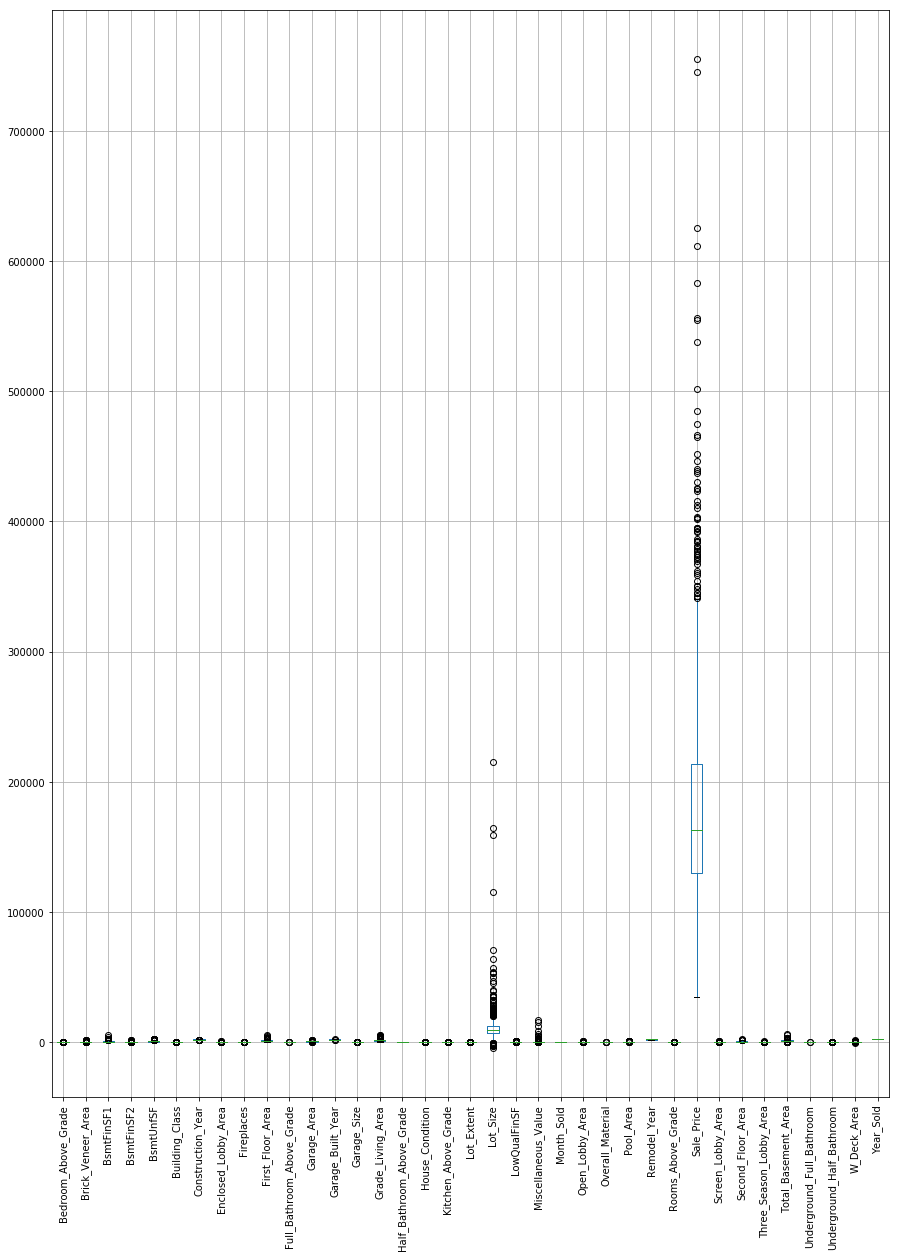

In [15]:
alldata.boxplot(rot=90,figsize=(15,20))


In [16]:
alldata.corr()


,Bedroom_Above_Grade,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Building_Class,Construction_Year,Enclosed_Lobby_Area,Fireplaces,First_Floor_Area,...,Rooms_Above_Grade,Sale_Price,Screen_Lobby_Area,Second_Floor_Area,Three_Season_Lobby_Area,Total_Basement_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,W_Deck_Area,Year_Sold
Bedroom_Above_Grade,1.000000,0.078164,-0.113612,-0.031316,0.183345,-0.008746,-0.053089,0.027822,0.086860,0.108406,...,0.669767,0.168272,0.007271,0.503607,-0.048273,0.053368,-0.155296,0.018863,0.013273,-0.020462
Brick_Veneer_Area,0.078164,1.000000,0.303713,-0.015373,0.089992,0.005262,0.314032,-0.051751,0.275069,0.395910,...,0.278191,0.477411,0.065157,0.120879,0.013592,0.397369,0.141844,0.014958,0.093882,-0.018480
BsmtFinSF1,-0.113612,0.303713,1.000000,-0.055487,-0.477258,-0.064072,0.279679,-0.047171,0.293438,0.458082,...,0.052232,0.386783,0.096920,-0.162109,0.050945,0.536419,0.638738,0.078445,0.140502,0.022512
BsmtFinSF2,-0.031316,-0.015373,-0.055487,1.000000,-0.237891,-0.072138,-0.027503,0.008226,0.066108,0.084240,...,-0.048300,-0.010952,0.063464,-0.097406,-0.023236,0.089218,0.162394,0.099642,0.069451,0.008809
BsmtUnfSF,0.183345,0.089992,-0.477258,-0.237891,1.000000,-0.126321,0.130426,0.010215,0.004509,0.296732,...,0.247453,0.214281,-0.049261,-0.000636,-0.005846,0.412520,-0.398462,-0.107222,-0.041822,-0.037969
Building_Class,-0.008746,0.005262,-0.064072,-0.072138,-0.126321,1.000000,0.034351,-0.000832,-0.055443,-0.248603,...,0.040429,-0.084563,-0.049274,0.309147,-0.037565,-0.219863,0.010279,-0.001953,-0.011910,-0.014983
Construction_Year,-0.053089,0.314032,0.279679,-0.027503,0.130426,0.034351,1.000000,-0.193412,0.170640,0.310837,...,0.114262,0.522877,-0.041067,0.017534,0.015950,0.408566,0.211702,-0.030301,0.122314,-0.012333
Enclosed_Lobby_Area,0.027822,-0.051751,-0.047171,0.008226,0.010215,-0.000832,-0.193412,1.000000,0.036631,-0.023040,...,0.010603,0.020789,-0.001339,0.022627,0.006656,-0.035413,-0.032818,-0.020909,-0.085612,-0.005550
Fireplaces,0.086860,0.275069,0.293438,0.066108,0.004509,-0.055443,0.170640,0.036631,1.000000,0.407687,...,0.311219,0.466828,0.169721,0.169785,0.018822,0.333161,0.169984,0.039192,0.148877,-0.006704
First_Floor_Area,0.108406,0.395910,0.458082,0.084240,0.296732,-0.248603,0.310837,-0.023040,0.407687,1.000000,...,0.391816,0.605971,0.098407,-0.249786,0.044095,0.801669,0.261779,0.011095,0.135182,-0.013455


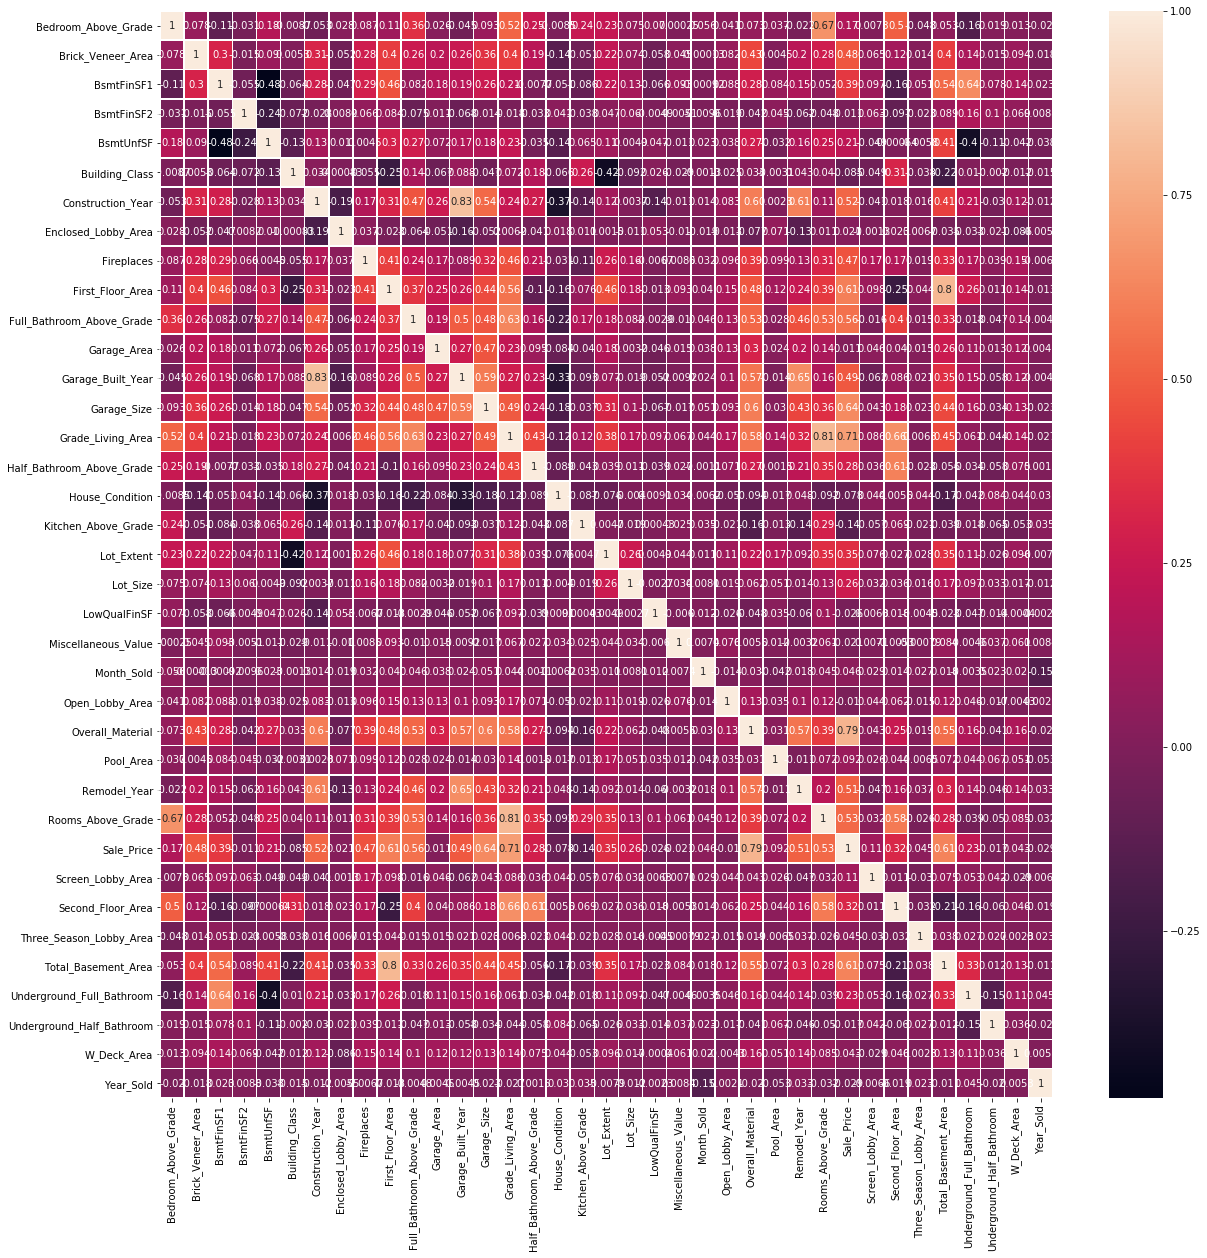

In [17]:
%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(alldata.corr(),annot=True , linewidths=.5)


In [18]:
# check for missing values
missing=alldata.isnull().sum()
missing=missing[missing>0]


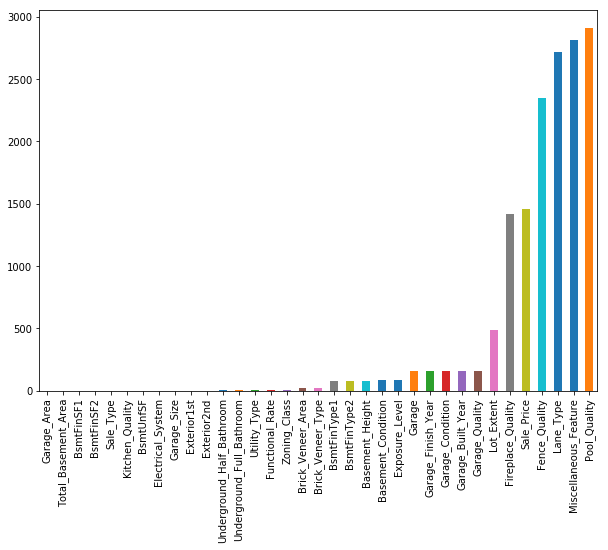

In [19]:
# plot missing values
missing.sort_values(inplace=True)
missing.plot.bar(figsize=(10,7))


In [20]:
# Handling missing values
alldata.fillna(alldata.median(), inplace=True)


In [21]:
# check for missing values
missing=alldata.isnull().sum()
missing=missing[missing>0]


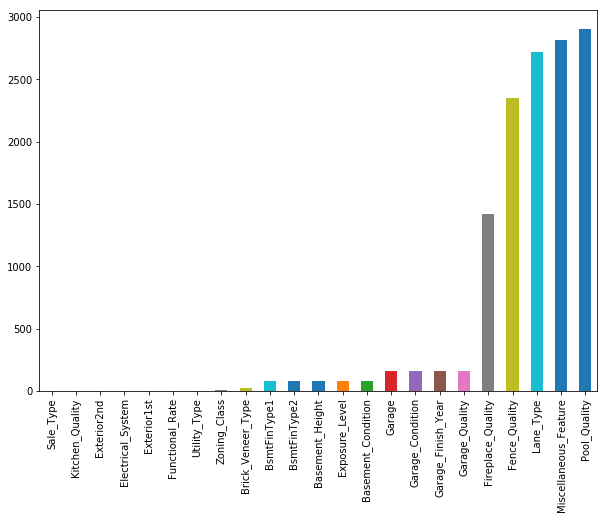

In [22]:
# plot missing values
missing.sort_values(inplace=True)
missing.plot.bar(figsize=(10,7))


In [23]:
df_categorical_features = alldata.select_dtypes(include=[np.object])
df_categorical_features.columns


Index(['Air_Conditioning', 'Basement_Condition', 'Basement_Height',
       'Brick_Veneer_Type', 'BsmtFinType1', 'BsmtFinType2', 'Condition1',
       'Condition2', 'Electrical_System', 'Exposure_Level', 'Exterior1st',
       'Exterior2nd', 'Exterior_Condition', 'Exterior_Material',
       'Fence_Quality', 'Fireplace_Quality', 'Foundation_Type',
       'Functional_Rate', 'Garage', 'Garage_Condition', 'Garage_Finish_Year',
       'Garage_Quality', 'Heating_Quality', 'Heating_Type', 'House_Design',
       'House_Type', 'Kitchen_Quality', 'Land_Outline', 'Lane_Type',
       'Lot_Configuration', 'Miscellaneous_Feature', 'Neighborhood',
       'Pavedd_Drive', 'Pool_Quality', 'Property_Shape', 'Property_Slope',
       'Road_Type', 'Roof_Design', 'Roof_Quality', 'Sale_Condition',
       'Sale_Type', 'Utility_Type', 'Zoning_Class'],
      dtype='object')

In [24]:
# Replace nan with None in these columns
cols_fillna = ['Pool_Quality','Miscellaneous_Feature','Lane_Type','Fence_Quality','Brick_Veneer_Type','Fireplace_Quality',
               'Garage_Quality','Garage_Condition', 'Electrical_System','Garage_Finish_Year', 
               'Exposure_Level','Basement_Condition','Basement_Height','BsmtFinType1','BsmtFinType2','Garage','Zoning_Class','Functional_Rate',
               'Utility_Type','Exterior1st','Sale_Type','Exterior2nd','Kitchen_Quality','Electrical_System']
for col in cols_fillna:
    alldata[col].fillna('None',inplace=True)


In [25]:
alldata.isnull().sum()


Air_Conditioning             0
Basement_Condition           0
Basement_Height              0
Bedroom_Above_Grade          0
Brick_Veneer_Area            0
Brick_Veneer_Type            0
BsmtFinSF1                   0
BsmtFinSF2                   0
BsmtFinType1                 0
BsmtFinType2                 0
BsmtUnfSF                    0
Building_Class               0
Condition1                   0
Condition2                   0
Construction_Year            0
Electrical_System            0
Enclosed_Lobby_Area          0
Exposure_Level               0
Exterior1st                  0
Exterior2nd                  0
Exterior_Condition           0
Exterior_Material            0
Fence_Quality                0
Fireplace_Quality            0
Fireplaces                   0
First_Floor_Area             0
Foundation_Type              0
Full_Bathroom_Above_Grade    0
Functional_Rate              0
Garage                       0
                            ..
LowQualFinSF                 0
Miscella

In [26]:
df_numeric_features = alldata.select_dtypes(include=[np.number])
df_numeric_features.columns


Index(['Bedroom_Above_Grade', 'Brick_Veneer_Area', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'Building_Class', 'Construction_Year',
       'Enclosed_Lobby_Area', 'Fireplaces', 'First_Floor_Area',
       'Full_Bathroom_Above_Grade', 'Garage_Area', 'Garage_Built_Year',
       'Garage_Size', 'Grade_Living_Area', 'Half_Bathroom_Above_Grade',
       'House_Condition', 'Kitchen_Above_Grade', 'Lot_Extent', 'Lot_Size',
       'LowQualFinSF', 'Miscellaneous_Value', 'Month_Sold', 'Open_Lobby_Area',
       'Overall_Material', 'Pool_Area', 'Remodel_Year', 'Rooms_Above_Grade',
       'Sale_Price', 'Screen_Lobby_Area', 'Second_Floor_Area',
       'Three_Season_Lobby_Area', 'Total_Basement_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom', 'W_Deck_Area',
       'Year_Sold'],
      dtype='object')

In [27]:
df_numeric_features.head()


,Bedroom_Above_Grade,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Building_Class,Construction_Year,Enclosed_Lobby_Area,Fireplaces,First_Floor_Area,...,Rooms_Above_Grade,Sale_Price,Screen_Lobby_Area,Second_Floor_Area,Three_Season_Lobby_Area,Total_Basement_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,W_Deck_Area,Year_Sold
0,3,196.0,706.0,0.0,150.0,60,2003,20.337934,0,856,...,8,208500.0,0,854,0,856.0,1.0,0.0,163.788080,2008
1,3,0.0,978.0,0.0,284.0,20,1976,15.039392,1,1262,...,6,181500.0,0,0,0,1262.0,0.0,1.0,198.900074,2007
2,3,162.0,486.0,0.0,434.0,60,2001,-46.232198,1,920,...,6,223500.0,0,866,0,920.0,1.0,0.0,26.127533,2008
3,3,0.0,216.0,0.0,540.0,70,1915,60.921821,1,961,...,7,140000.0,0,756,0,756.0,1.0,0.0,46.948018,2006
4,4,350.0,655.0,0.0,490.0,60,2000,21.788818,1,1145,...,9,250000.0,0,1053,0,1145.0,1.0,0.0,-10.626105,2008


In [28]:
df_categorical_features = alldata.select_dtypes(include=[np.object])
df_categorical_features.columns


Index(['Air_Conditioning', 'Basement_Condition', 'Basement_Height',
       'Brick_Veneer_Type', 'BsmtFinType1', 'BsmtFinType2', 'Condition1',
       'Condition2', 'Electrical_System', 'Exposure_Level', 'Exterior1st',
       'Exterior2nd', 'Exterior_Condition', 'Exterior_Material',
       'Fence_Quality', 'Fireplace_Quality', 'Foundation_Type',
       'Functional_Rate', 'Garage', 'Garage_Condition', 'Garage_Finish_Year',
       'Garage_Quality', 'Heating_Quality', 'Heating_Type', 'House_Design',
       'House_Type', 'Kitchen_Quality', 'Land_Outline', 'Lane_Type',
       'Lot_Configuration', 'Miscellaneous_Feature', 'Neighborhood',
       'Pavedd_Drive', 'Pool_Quality', 'Property_Shape', 'Property_Slope',
       'Road_Type', 'Roof_Design', 'Roof_Quality', 'Sale_Condition',
       'Sale_Type', 'Utility_Type', 'Zoning_Class'],
      dtype='object')

In [29]:
df_categorical_features.head()


,Air_Conditioning,Basement_Condition,Basement_Height,Brick_Veneer_Type,BsmtFinType1,BsmtFinType2,Condition1,Condition2,Electrical_System,Exposure_Level,...,Pool_Quality,Property_Shape,Property_Slope,Road_Type,Roof_Design,Roof_Quality,Sale_Condition,Sale_Type,Utility_Type,Zoning_Class
0,Y,TA,Gd,BrkFace,GLQ,Unf,Norm,Norm,SBrkr,No,...,None,Reg,GS,Paved,Gable,SS,Normal,WD,AllPub,RLD
1,Y,TA,Gd,None,ALQ,Unf,Feedr,Norm,SBrkr,Gd,...,None,Reg,GS,Paved,Gable,SS,Normal,WD,AllPub,RLD
2,Y,TA,Gd,BrkFace,GLQ,Unf,Norm,Norm,SBrkr,Mn,...,None,IR1,GS,Paved,Gable,SS,Normal,WD,AllPub,RLD
3,Y,Gd,TA,None,ALQ,Unf,Norm,Norm,SBrkr,No,...,None,IR1,GS,Paved,Gable,SS,Abnorml,WD,AllPub,RLD
4,Y,TA,Gd,BrkFace,GLQ,Unf,Norm,Norm,SBrkr,Av,...,None,IR1,GS,Paved,Gable,SS,Normal,WD,AllPub,RLD


In [30]:
# apply the min-max scaling to our numeric variables
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

# Scaling down the numeric variables
df_housingdata_numcols = pd.DataFrame(min_max.fit_transform(df_numeric_features.iloc[:,0:36]),
columns = df_numeric_features.iloc[:,0:36].columns.tolist())


In [31]:
df_housingdata_numcols.head()


,Bedroom_Above_Grade,Brick_Veneer_Area,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Building_Class,Construction_Year,Enclosed_Lobby_Area,Fireplaces,First_Floor_Area,...,Remodel_Year,Rooms_Above_Grade,Sale_Price,Screen_Lobby_Area,Second_Floor_Area,Three_Season_Lobby_Area,Total_Basement_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,W_Deck_Area
0,0.375,0.12250,0.125089,0.0,0.064212,0.235294,0.949275,0.157328,0.00,0.109641,...,0.883333,0.461538,0.241078,0.0,0.413559,0.0,0.140098,0.333333,0.0,0.284829
1,0.375,0.00000,0.173281,0.0,0.121575,0.000000,0.753623,0.152826,0.25,0.194917,...,0.433333,0.307692,0.203583,0.0,0.000000,0.0,0.206547,0.000000,0.5,0.304755
2,0.375,0.10125,0.086109,0.0,0.185788,0.235294,0.934783,0.100760,0.25,0.123083,...,0.866667,0.307692,0.261908,0.0,0.419370,0.0,0.150573,0.333333,0.0,0.206706
3,0.375,0.00000,0.038271,0.0,0.231164,0.294118,0.311594,0.191815,0.25,0.131695,...,0.333333,0.384615,0.145952,0.0,0.366102,0.0,0.123732,0.333333,0.0,0.218522
4,0.500,0.21875,0.116052,0.0,0.209760,0.235294,0.927536,0.158561,0.25,0.170342,...,0.833333,0.538462,0.298709,0.0,0.509927,0.0,0.187398,0.333333,0.0,0.185849


In [39]:
for col in  df_categorical_features.columns.values:
    one_hot_encoded_variables = pd.get_dummies(df_categorical_features[col],prefix=col)
    df_categorical_features = pd.concat([df_categorical_features,one_hot_encoded_variables],axis=1)
    df_categorical_features.drop([col],axis=1, inplace=True)

In [40]:
df_categorical_features.shape


(2918, 566)

In [41]:
df_housingdata_numcols.shape

(2918, 36)

In [42]:
df_housedata=pd.concat([df_categorical_features,df_housingdata_numcols]).sort_index()

C:\Users\Yogini\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [43]:
df_housedata.head()


,Air_Conditioning_N_0,Air_Conditioning_N_1,Air_Conditioning_Y_0,Air_Conditioning_Y_1,Basement_Condition_Fa_0,Basement_Condition_Fa_1,Basement_Condition_Gd_0,Basement_Condition_Gd_1,Basement_Condition_None_0,Basement_Condition_None_1,...,Zoning_Class_FVR_0,Zoning_Class_FVR_1,Zoning_Class_None_0,Zoning_Class_None_1,Zoning_Class_RHD_0,Zoning_Class_RHD_1,Zoning_Class_RLD_0,Zoning_Class_RLD_1,Zoning_Class_RMD_0,Zoning_Class_RMD_1
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#Create training and testing datasets using the train_test_split¶
from sklearn.model_selection import train_test_split

In [69]:
x=df_housedata.drop(['Sale_Price'],axis=1)

In [70]:
y=df_housedata['Sale_Price']

In [71]:
#create feature and response variable set
# we create train & test sample fro our dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4085, 601) (1751, 601) (4085,) (1751,)


In [72]:
df_housedata.shape

(5836, 602)

In [73]:
x_train.isnull().sum()

Air_Conditioning_N_0           0
Air_Conditioning_N_1           0
Air_Conditioning_Y_0           0
Air_Conditioning_Y_1           0
Basement_Condition_Fa_0        0
Basement_Condition_Fa_1        0
Basement_Condition_Gd_0        0
Basement_Condition_Gd_1        0
Basement_Condition_None_0      0
Basement_Condition_None_1      0
Basement_Condition_Po_0        0
Basement_Condition_Po_1        0
Basement_Condition_TA_0        0
Basement_Condition_TA_1        0
Basement_Height_Ex_0           0
Basement_Height_Ex_1           0
Basement_Height_Fa_0           0
Basement_Height_Fa_1           0
Basement_Height_Gd_0           0
Basement_Height_Gd_1           0
Basement_Height_None_0         0
Basement_Height_None_1         0
Basement_Height_TA_0           0
Basement_Height_TA_1           0
Bedroom_Above_Grade            0
Brick_Veneer_Area              0
Brick_Veneer_Type_BrkCmn_0     0
Brick_Veneer_Type_BrkCmn_1     0
Brick_Veneer_Type_BrkFace_0    0
Brick_Veneer_Type_BrkFace_1    0
          

In [74]:
# Replace nan with None in these columns
df_housedata.fillna(df_housedata.median(), inplace=True)


In [75]:
df_housedata.isnull().sum()

Air_Conditioning_N_0           0
Air_Conditioning_N_1           0
Air_Conditioning_Y_0           0
Air_Conditioning_Y_1           0
Basement_Condition_Fa_0        0
Basement_Condition_Fa_1        0
Basement_Condition_Gd_0        0
Basement_Condition_Gd_1        0
Basement_Condition_None_0      0
Basement_Condition_None_1      0
Basement_Condition_Po_0        0
Basement_Condition_Po_1        0
Basement_Condition_TA_0        0
Basement_Condition_TA_1        0
Basement_Height_Ex_0           0
Basement_Height_Ex_1           0
Basement_Height_Fa_0           0
Basement_Height_Fa_1           0
Basement_Height_Gd_0           0
Basement_Height_Gd_1           0
Basement_Height_None_0         0
Basement_Height_None_1         0
Basement_Height_TA_0           0
Basement_Height_TA_1           0
Bedroom_Above_Grade            0
Brick_Veneer_Area              0
Brick_Veneer_Type_BrkCmn_0     0
Brick_Veneer_Type_BrkCmn_1     0
Brick_Veneer_Type_BrkFace_0    0
Brick_Veneer_Type_BrkFace_1    0
          

In [77]:
#Use SGD Regressor() to build a linear mode
import numpy as np
from sklearn.linear_model import SGDRegressor
lin_model = SGDRegressor()

lin_model.fit(x_train,y_train)
lin_model_predictions = lin_model.predict(x_test)
print(lin_model.score(x_test,y_test))

C:\Users\Yogini\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.35098315631169164
